In [1]:
import yfinance as yf
import numpy as np
import pandas as pd
import matplotlib as mpl


In [2]:
data = yf.download('AMZN', start='2020-03-01', end='2021-03-01')

[*********************100%***********************]  1 of 1 completed


In [9]:
print(data)

                   Open         High          Low        Close    Adj Close  \
Date                                                                          
2020-03-02  1906.489990  1954.510010  1870.000000  1953.949951  1953.949951   
2020-03-03  1975.369995  1996.329956  1888.089966  1908.989990  1908.989990   
2020-03-04  1946.569946  1978.000000  1922.000000  1975.829956  1975.829956   
2020-03-05  1933.000000  1960.719971  1910.000000  1924.030029  1924.030029   
2020-03-06  1875.000000  1910.869995  1869.500000  1901.089966  1901.089966   
...                 ...          ...          ...          ...          ...   
2021-02-22  3208.129883  3232.320068  3172.260010  3180.739990  3180.739990   
2021-02-23  3127.030029  3204.729980  3093.600098  3194.500000  3194.500000   
2021-02-24  3166.750000  3171.229980  3125.379883  3159.530029  3159.530029   
2021-02-25  3136.739990  3178.260010  3047.760010  3057.159912  3057.159912   
2021-02-26  3095.199951  3122.439941  3036.699951  3

In [11]:
ADJ =  pd.DataFrame(data = data['Adj Close']) 
ADJ

,Adj Close
Date,
2020-03-02,1953.949951
2020-03-03,1908.989990
2020-03-04,1975.829956
2020-03-05,1924.030029
2020-03-06,1901.089966
...,...
2021-02-22,3180.739990
2021-02-23,3194.500000
2021-02-24,3159.530029


In [23]:
data.rename(columns={'Date' : 'date', 'Adj Close' : 'price_t'}, inplace=True)

In [24]:
data.head()

,Open,High,Low,Close,price_t,Volume
Date,,,,,,
2020-03-02,1906.489990,1954.510010,1870.000000,1953.949951,1953.949951,6761700
2020-03-03,1975.369995,1996.329956,1888.089966,1908.989990,1908.989990,7534500
2020-03-04,1946.569946,1978.000000,1922.000000,1975.829956,1975.829956,4772900
2020-03-05,1933.000000,1960.719971,1910.000000,1924.030029,1924.030029,4748200
2020-03-06,1875.000000,1910.869995,1869.500000,1901.089966,1901.089966,5273600


In [36]:
data =  pd.DataFrame(data = data['price_t']) 
data

,price_t
Date,
2020-03-02,1953.949951
2020-03-03,1908.989990
2020-03-04,1975.829956
2020-03-05,1924.030029
2020-03-06,1901.089966
...,...
2021-02-22,3180.739990
2021-02-23,3194.500000
2021-02-24,3159.530029


In [44]:
data['price_t-1'] = data['price_t'].shift(1)

In [45]:
data.head()

,price_t,returns,price_t-1
Date,,,
2020-03-02,1953.949951,-inf,NaN
2020-03-03,1908.989990,-inf,1953.949951
2020-03-04,1975.829956,-inf,1908.989990
2020-03-05,1924.030029,-inf,1975.829956
2020-03-06,1901.089966,-inf,1924.030029


In [46]:
data['returns_manual'] = (data['price_t'] / data['price_t-1']) - 1

In [47]:
data.head()

,price_t,returns,price_t-1,returns_manual
Date,,,,
2020-03-02,1953.949951,-inf,NaN,NaN
2020-03-03,1908.989990,-inf,1953.949951,-0.023010
2020-03-04,1975.829956,-inf,1908.989990,0.035013
2020-03-05,1924.030029,-inf,1975.829956,-0.026217
2020-03-06,1901.089966,-inf,1924.030029,-0.011923


In [48]:
data.tail()

,price_t,returns,price_t-1,returns_manual
Date,,,,
2021-02-22,3180.739990,-inf,3249.899902,-0.021281
2021-02-23,3194.500000,-inf,3180.739990,0.004326
2021-02-24,3159.530029,-inf,3194.500000,-0.010947
2021-02-25,3057.159912,-inf,3159.530029,-0.032400
2021-02-26,3092.929932,NaN,3057.159912,0.011700


In [57]:
data['return_pct_change_method'] = data['price_t'].pct_change(1)

In [59]:
data.head()

,price_t,returns,price_t-1,returns_manual,return,return_pct_change_method
Date,,,,,,
2020-03-02,1953.949951,-inf,NaN,NaN,NaN,NaN
2020-03-03,1908.989990,-inf,1953.949951,-0.023010,-0.023010,-0.023010
2020-03-04,1975.829956,-inf,1908.989990,0.035013,0.035013,0.035013
2020-03-05,1924.030029,-inf,1975.829956,-0.026217,-0.026217,-0.026217
2020-03-06,1901.089966,-inf,1924.030029,-0.011923,-0.011923,-0.011923


In [60]:
data.tail()

,price_t,returns,price_t-1,returns_manual,return,return_pct_change_method
Date,,,,,,
2021-02-22,3180.739990,-inf,3249.899902,-0.021281,-0.021281,-0.021281
2021-02-23,3194.500000,-inf,3180.739990,0.004326,0.004326,0.004326
2021-02-24,3159.530029,-inf,3194.500000,-0.010947,-0.010947,-0.010947
2021-02-25,3057.159912,-inf,3159.530029,-0.032400,-0.032400,-0.032400
2021-02-26,3092.929932,NaN,3057.159912,0.011700,0.011700,0.011700


In [63]:
data['returns'] = (data['price_t'] / data['price_t'].shift(1)) - 1

In [64]:
data.head()

,price_t,returns,price_t-1,returns_manual,return,return_pct_change_method
Date,,,,,,
2020-03-02,1953.949951,NaN,NaN,NaN,NaN,NaN
2020-03-03,1908.989990,-0.023010,1953.949951,-0.023010,-0.023010,-0.023010
2020-03-04,1975.829956,0.035013,1908.989990,0.035013,0.035013,0.035013
2020-03-05,1924.030029,-0.026217,1975.829956,-0.026217,-0.026217,-0.026217
2020-03-06,1901.089966,-0.011923,1924.030029,-0.011923,-0.011923,-0.011923


<AxesSubplot:xlabel='Date'>

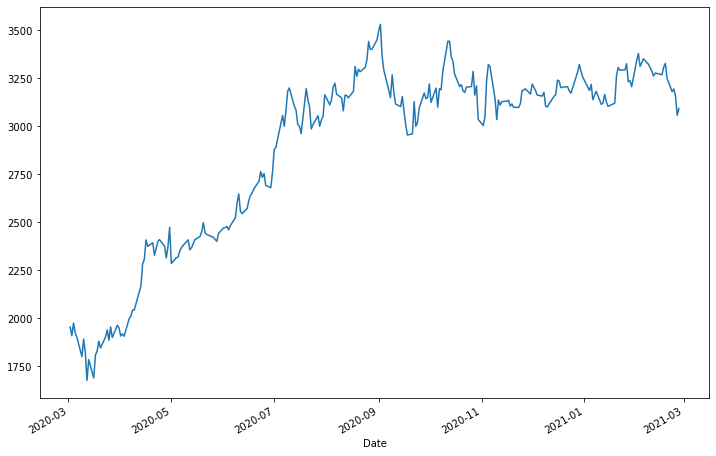

In [70]:
data['price_t'].plot(figsize=(12, 8))

<AxesSubplot:xlabel='Date'>

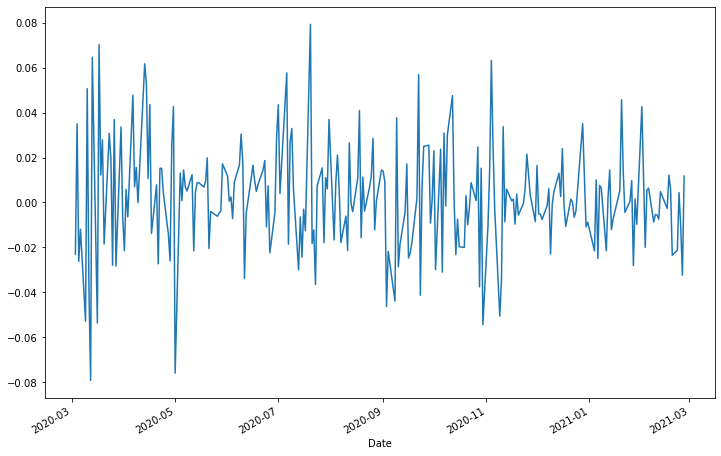

In [72]:
data['returns'].plot(figsize=(12, 8))

In [73]:
daily_std =np.std(data.returns)
daily_std

0.023934136093383216

In [74]:
std = daily_std * np.sqrt(252) **(0.5)
std

0.09536036207217917

In [78]:
std = daily_std * np.sqrt(126) **(0.5)
std

0.08018818662379174